# 차기 신도시 아파트 공급을 위한 경기도 외각지역 위치 추천 &연도별 아파트 면적 선호도 추이
## 데이터 분석 및 시각화 과정 세미 프로젝트(M조) : 

## 신도시 아파트 거래매매량 추이(면적별) (2013년-2022년)

#### 처리 목적
* 1기, 2기 신도시의 아파트 거래매매량을 통하여 선호하는 아파트 면적 확인

#### 처리 사항
1. 1기 및 2기 신도시의 아파트 거래매매량 데이터 수집
2. 아파트 면적을 9구간으로 나누어 기간별 면적(규모) 선호도 추이 확인
3. 결과를 시각화

#### 활용 데이터
* KOSIS 국가통계포털의 데이터:
https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0067&vw_cd=MT_ZTITLE&list_id=408_31503_004&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do

In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터 불러오기

In [4]:
#데이터 불러오기
data=pd.read_csv("Pdata/신도시_거래규모별_아파트매매거래현황(2012_2022).csv",encoding='CP949')
data.head(3)

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,Unnamed: 124
0,수원시 영통구,거래규모,호수[호수],호수,510.0,80.0,228.0,325.0,352.0,446.0,...,211.0,235.0,190.0,118.0,99.0,199.0,74.0,82.0,120.0,NaN
1,수원시 영통구,거래규모,면적[천㎡],천㎡,38.0,6.0,18.0,25.0,27.0,34.0,...,16.0,17.0,15.0,9.0,7.0,17.0,6.0,6.0,9.0,NaN
2,수원시 영통구,20㎡이하,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### 불러온 데이터 확인하기

In [5]:
#데이터 정보확인
data.항목.unique()

array(['호수[호수]', '면적[천㎡]'], dtype=object)

In [6]:
#데이터 정보확인
data.describe()

,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,2013.06 월,2013.07 월,2013.08 월,2013.09 월,...,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,Unnamed: 124
count,280.00000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.00000,0.0
mean,51.70000,9.060714,25.292857,35.782143,45.192857,53.135714,71.942857,17.532143,24.110714,36.089286,...,16.942857,21.867857,23.125000,15.810714,10.996429,10.014286,8.117857,9.785714,15.47500,NaN
std,134.87077,24.910015,68.958197,91.102717,118.134751,134.489595,184.628146,45.052725,60.816121,89.252948,...,43.701295,54.948464,59.473756,41.277840,29.971133,27.685118,23.193058,34.254955,84.84132,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
50%,3.00000,1.000000,1.000000,3.000000,2.500000,4.000000,6.000000,1.000000,2.000000,3.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,NaN
75%,24.75000,3.000000,11.000000,19.000000,22.000000,23.500000,35.250000,9.000000,13.000000,17.250000,...,9.000000,11.000000,12.000000,9.000000,5.000000,4.000000,3.000000,4.000000,5.00000,NaN
max,1005.00000,177.000000,507.000000,584.000000,875.000000,1072.000000,1337.000000,319.000000,397.000000,539.000000,...,311.000000,349.000000,515.000000,293.000000,251.000000,204.000000,219.000000,376.000000,1050.00000,NaN


In [7]:
#데이터 정보확인
data.columns

Index(['행정구역별', '거래규모별', '항목', '단위', '2012.12 월', '2013.01 월', '2013.02 월',
       '2013.03 월', '2013.04 월', '2013.05 월',
       ...
       '2022.03 월', '2022.04 월', '2022.05 월', '2022.06 월', '2022.07 월',
       '2022.08 월', '2022.09 월', '2022.10 월', '2022.11 월', 'Unnamed: 124'],
      dtype='object', length=125)

## 2. 데이터 살펴보기

### 데이터 불필요한 컬럼 제거

In [8]:
# 불필요한 컬럼 제거
del data['Unnamed: 124']
data.head(3)

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월
0,수원시 영통구,거래규모,호수[호수],호수,510.0,80.0,228.0,325.0,352.0,446.0,...,115.0,211.0,235.0,190.0,118.0,99.0,199.0,74.0,82.0,120.0
1,수원시 영통구,거래규모,면적[천㎡],천㎡,38.0,6.0,18.0,25.0,27.0,34.0,...,9.0,16.0,17.0,15.0,9.0,7.0,17.0,6.0,6.0,9.0
2,수원시 영통구,20㎡이하,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#데이터 정보확인
data.value_counts()

행정구역별     거래규모별     항목      단위  2012.12 월  2013.01 월  2013.02 월  2013.03 월  2013.04 월  2013.05 월  2013.06 월  2013.07 월  2013.08 월  2013.09 월  2013.10 월  2013.11 월  2013.12 월  2014.01 월  2014.02 월  2014.03 월  2014.04 월  2014.05 월  2014.06 월  2014.07 월  2014.08 월  2014.09 월  2014.10 월  2014.11 월  2014.12 월  2015.01 월  2015.02 월  2015.03 월  2015.04 월  2015.05 월  2015.06 월  2015.07 월  2015.08 월  2015.09 월  2015.10 월  2015.11 월  2015.12 월  2016.01 월  2016.02 월  2016.03 월  2016.04 월  2016.05 월  2016.06 월  2016.07 월  2016.08 월  2016.09 월  2016.10 월  2016.11 월  2016.12 월  2017.01 월  2017.02 월  2017.03 월  2017.04 월  2017.05 월  2017.06 월  2017.07 월  2017.08 월  2017.09 월  2017.10 월  2017.11 월  2017.12 월  2018.01 월  2018.02 월  2018.03 월  2018.04 월  2018.05 월  2018.06 월  2018.07 월  2018.08 월  2018.09 월  2018.10 월  2018.11 월  2018.12 월  2019.01 월  2019.02 월  2019.03 월  2019.04 월  2019.05 월  2019.06 월  2019.07 월  2019.08 월  2019.09 월  2019.10 월  2019.11 월  2019.12 월  2020.01 월  2020.02 월  2020.03 월  

### 데이터 결측치 확인

In [10]:
# 데이터 결측치 유무 확인
data.isnull().sum(axis=0)

행정구역별         0
거래규모별         0
항목            0
단위            0
2012.12 월    20
             ..
2022.07 월    20
2022.08 월    20
2022.09 월    20
2022.10 월    20
2022.11 월    20
Length: 124, dtype: int64

In [11]:
#데이터 결측치 유무 확인
missing_data = data.T.isnull()
missing_data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
행정구역별,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
거래규모별,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
항목,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
단위,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012.12 월,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.07 월,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022.08 월,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022.09 월,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022.10 월,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#결측치 포함한 컬럼 확인
for col in missing_data.columns:
    missing_count = missing_data[col].value_counts()
    
    try:
        print(col, ':',missing_count[True])
    except:
        pass

120 : 108
121 : 108
122 : 108
123 : 108
124 : 108
125 : 108
126 : 108
127 : 108
128 : 108
129 : 108
130 : 108
131 : 108
132 : 108
133 : 108
134 : 108
135 : 108
136 : 108
137 : 108
138 : 108
139 : 108


In [13]:
#결측치 포함 컬럼 확인
data.loc[120:139]

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월
120,부천시 원미구,거래규모,호수[호수],호수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,부천시 원미구,거래규모,면적[천㎡],천㎡,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,부천시 원미구,20㎡이하,호수[호수],호수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,부천시 원미구,20㎡이하,면적[천㎡],천㎡,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,부천시 원미구,21~40㎡,호수[호수],호수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,부천시 원미구,21~40㎡,면적[천㎡],천㎡,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,부천시 원미구,41~60㎡,호수[호수],호수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,부천시 원미구,41~60㎡,면적[천㎡],천㎡,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,부천시 원미구,61~85㎡,호수[호수],호수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,부천시 원미구,61~85㎡,면적[천㎡],천㎡,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 결측치 처리하기
* 부천시 원미구는 2016년 행정구가 폐지되었기때문에 부천시 원미구의 값을 제거 처리

In [14]:
# 결측치 포함 행 : 부천시 원미구
# 부천시 원미구 행 제거 : 2016년 행정구 폐지
data0 = data.set_index('행정구역별')
data0 = data0.drop('부천시 원미구',axis =0)
data0.reset_index(inplace=True)

In [15]:
# 결측치 제거 처리 후 확인
missing_data0 = data0.T.isnull()

In [16]:
# 결측치 제거 처리 후 확인
for col in missing_data0.columns:
    missing_count = missing_data0[col].value_counts()
    
    try:
        print(col, ':',missing_count[True])
    except:
        pass

### 결측치 처리한 데이터 확인

In [17]:
# 결측치 제거 처리 한 데이터
data0

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월
0,수원시 영통구,거래규모,호수[호수],호수,510.0,80.0,228.0,325.0,352.0,446.0,...,115.0,211.0,235.0,190.0,118.0,99.0,199.0,74.0,82.0,120.0
1,수원시 영통구,거래규모,면적[천㎡],천㎡,38.0,6.0,18.0,25.0,27.0,34.0,...,9.0,16.0,17.0,15.0,9.0,7.0,17.0,6.0,6.0,9.0
2,수원시 영통구,20㎡이하,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,수원시 영통구,20㎡이하,면적[천㎡],천㎡,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,수원시 영통구,21~40㎡,호수[호수],호수,15.0,1.0,6.0,4.0,4.0,7.0,...,3.0,6.0,7.0,4.0,5.0,4.0,3.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,양주시,136~165㎡,면적[천㎡],천㎡,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,양주시,166~198㎡,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,양주시,166~198㎡,면적[천㎡],천㎡,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,양주시,198㎡초과,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1) 기간별 아파트 매매거래량 현황 확인(규모별)

* 아파트 매매거래량의 규모구간별 평균 면적량은 불필요하기때문에 제거

In [18]:
### ### # 불필요한 행 제거
mask = (data0['항목'] != '면적[천㎡]')
data1 = data0[mask]
data1.head(20)

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월
0,수원시 영통구,거래규모,호수[호수],호수,510.0,80.0,228.0,325.0,352.0,446.0,...,115.0,211.0,235.0,190.0,118.0,99.0,199.0,74.0,82.0,120.0
2,수원시 영통구,20㎡이하,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,수원시 영통구,21~40㎡,호수[호수],호수,15.0,1.0,6.0,4.0,4.0,7.0,...,3.0,6.0,7.0,4.0,5.0,4.0,3.0,2.0,1.0,2.0
6,수원시 영통구,41~60㎡,호수[호수],호수,240.0,33.0,113.0,159.0,184.0,215.0,...,37.0,63.0,94.0,85.0,51.0,46.0,43.0,31.0,31.0,52.0
8,수원시 영통구,61~85㎡,호수[호수],호수,181.0,34.0,59.0,112.0,102.0,138.0,...,58.0,131.0,109.0,64.0,44.0,32.0,34.0,33.0,39.0,58.0
10,수원시 영통구,86~100㎡,호수[호수],호수,11.0,1.0,5.0,1.0,8.0,7.0,...,4.0,1.0,2.0,4.0,3.0,2.0,6.0,1.0,4.0,2.0
12,수원시 영통구,101~135㎡,호수[호수],호수,52.0,10.0,33.0,38.0,38.0,63.0,...,12.0,9.0,20.0,32.0,15.0,15.0,112.0,6.0,7.0,6.0
14,수원시 영통구,136~165㎡,호수[호수],호수,10.0,1.0,9.0,4.0,9.0,11.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
16,수원시 영통구,166~198㎡,호수[호수],호수,1.0,0.0,3.0,7.0,7.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,수원시 영통구,198㎡초과,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 데이터 확인
data2 = data1.T
data2.head()

,0,2,4,6,8,10,12,14,16,18,...,260,262,264,266,268,270,272,274,276,278
행정구역별,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,수원시 영통구,...,양주시,양주시,양주시,양주시,양주시,양주시,양주시,양주시,양주시,양주시
거래규모별,거래규모,20㎡이하,21~40㎡,41~60㎡,61~85㎡,86~100㎡,101~135㎡,136~165㎡,166~198㎡,198㎡초과,...,거래규모,20㎡이하,21~40㎡,41~60㎡,61~85㎡,86~100㎡,101~135㎡,136~165㎡,166~198㎡,198㎡초과
항목,호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],...,호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수],호수[호수]
단위,호수,호수,호수,호수,호수,호수,호수,호수,호수,호수,...,호수,호수,호수,호수,호수,호수,호수,호수,호수,호수
2012.12 월,510.0,0.0,15.0,240.0,181.0,11.0,52.0,10.0,1.0,0.0,...,255.0,0.0,3.0,104.0,127.0,10.0,11.0,0.0,0.0,0.0


#### 1)-1 아파트 매매거래량 연도별 합계 데이터 프레임 생성

In [23]:
# 년도별 합계 행만 데이터프레임으로 생성
temp=[]
for i in range(10):
    temp.append(data2.iloc[12*i+4:12*i+4+12])

In [24]:
# 데이터 프레임 수정 
temp2=[]
for i in range(10):
    temp2.append(temp[i].T)

In [25]:
# 년도별 합계를 연결하여 데이터 프레임 생성
temp3=pd.DataFrame(temp2[0].sum(axis = 1))
for i in range(1,10):
    temp3=pd.concat([temp3, temp2[i].sum(axis = 1)], axis =1)
temp3
data_total = temp3

,0,0,0,0,0,0,0,0,0,0
0,4762.0,7294.0,7311.0,6388.0,6236.0,7385.0,6066.0,10254.0,9940.0,1902.0
2,0.0,13.0,17.0,8.0,2.0,2.0,4.0,14.0,6.0,0.0
4,72.0,123.0,103.0,74.0,122.0,97.0,78.0,149.0,108.0,43.0
6,2340.0,3637.0,3518.0,3184.0,2806.0,2683.0,2307.0,5121.0,3161.0,629.0
8,1510.0,2215.0,2351.0,2096.0,2115.0,2599.0,2307.0,3390.0,5074.0,868.0
...,...,...,...,...,...,...,...,...,...,...
270,40.0,75.0,91.0,84.0,35.0,58.0,50.0,82.0,53.0,18.0
272,116.0,141.0,283.0,304.0,154.0,152.0,128.0,261.0,205.0,45.0
274,3.0,5.0,15.0,26.0,6.0,7.0,8.0,15.0,14.0,2.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# 컬럼 이름 부여
data_total=temp3.set_axis(['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년'], axis="columns")
data_total

,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,4762.0,7294.0,7311.0,6388.0,6236.0,7385.0,6066.0,10254.0,9940.0,1902.0
2,0.0,13.0,17.0,8.0,2.0,2.0,4.0,14.0,6.0,0.0
4,72.0,123.0,103.0,74.0,122.0,97.0,78.0,149.0,108.0,43.0
6,2340.0,3637.0,3518.0,3184.0,2806.0,2683.0,2307.0,5121.0,3161.0,629.0
8,1510.0,2215.0,2351.0,2096.0,2115.0,2599.0,2307.0,3390.0,5074.0,868.0
...,...,...,...,...,...,...,...,...,...,...
270,40.0,75.0,91.0,84.0,35.0,58.0,50.0,82.0,53.0,18.0
272,116.0,141.0,283.0,304.0,154.0,152.0,128.0,261.0,205.0,45.0
274,3.0,5.0,15.0,26.0,6.0,7.0,8.0,15.0,14.0,2.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# 데이터 정보확인
data1.head(3)

,행정구역별,거래규모별,항목,단위,2012.12 월,2013.01 월,2013.02 월,2013.03 월,2013.04 월,2013.05 월,...,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월
0,수원시 영통구,거래규모,호수[호수],호수,510.0,80.0,228.0,325.0,352.0,446.0,...,115.0,211.0,235.0,190.0,118.0,99.0,199.0,74.0,82.0,120.0
2,수원시 영통구,20㎡이하,호수[호수],호수,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,수원시 영통구,21~40㎡,호수[호수],호수,15.0,1.0,6.0,4.0,4.0,7.0,...,3.0,6.0,7.0,4.0,5.0,4.0,3.0,2.0,1.0,2.0


In [28]:
# 필요한 컬럼을 추출하여 새로운 데이터프레임 생성
data3 = data1[['행정구역별','거래규모별','항목']]
data3

,행정구역별,거래규모별,항목
0,수원시 영통구,거래규모,호수[호수]
2,수원시 영통구,20㎡이하,호수[호수]
4,수원시 영통구,21~40㎡,호수[호수]
6,수원시 영통구,41~60㎡,호수[호수]
8,수원시 영통구,61~85㎡,호수[호수]
...,...,...,...
270,양주시,86~100㎡,호수[호수]
272,양주시,101~135㎡,호수[호수]
274,양주시,136~165㎡,호수[호수]
276,양주시,166~198㎡,호수[호수]


#### 1)-2 아파트 매매거래량 기간별 규모(면적) 선호도 확인

* 월별 집계 데이터를 연단위로 확인할 수 있도록 데이터 프레임 생성

In [29]:
#### 1)-1 아파트 매매거래량 연도별 합계 데이터 프레임 생성#### 1)-1 아파트 매매거래량 연도별 합계 데이터 프레임 생성
new_data_total = pd.concat([data3,data_total],axis=1)
new_data_total.head(3)

,행정구역별,거래규모별,항목,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,수원시 영통구,거래규모,호수[호수],4762.0,7294.0,7311.0,6388.0,6236.0,7385.0,6066.0,10254.0,9940.0,1902.0
2,수원시 영통구,20㎡이하,호수[호수],0.0,13.0,17.0,8.0,2.0,2.0,4.0,14.0,6.0,0.0
4,수원시 영통구,21~40㎡,호수[호수],72.0,123.0,103.0,74.0,122.0,97.0,78.0,149.0,108.0,43.0


In [30]:
# 데이터 정보 확인
new_data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 278
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   140 non-null    object 
 1   거래규모별   140 non-null    object 
 2   항목      140 non-null    object 
 3   2013년   140 non-null    float64
 4   2014년   140 non-null    float64
 5   2015년   140 non-null    float64
 6   2016년   140 non-null    float64
 7   2017년   140 non-null    float64
 8   2018년   140 non-null    float64
 9   2019년   140 non-null    float64
 10  2020년   140 non-null    float64
 11  2021년   140 non-null    float64
 12  2022년   140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 19.4+ KB


In [31]:
# 데이터 정보 확인
new_data_total.행정구역별.unique()

array(['수원시 영통구', '성남시', '성남시 수정구', '성남시 중원구', '성남시 분당구', '안양시 동안구',
       '고양시 일산동구', '고양시 일산서구', '군포시', '하남시', '파주시', '김포시', '화성시', '양주시'],
      dtype=object)

In [32]:
# 데이터 정보 확인
new_data_total.head()

,행정구역별,거래규모별,항목,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,수원시 영통구,거래규모,호수[호수],4762.0,7294.0,7311.0,6388.0,6236.0,7385.0,6066.0,10254.0,9940.0,1902.0
2,수원시 영통구,20㎡이하,호수[호수],0.0,13.0,17.0,8.0,2.0,2.0,4.0,14.0,6.0,0.0
4,수원시 영통구,21~40㎡,호수[호수],72.0,123.0,103.0,74.0,122.0,97.0,78.0,149.0,108.0,43.0
6,수원시 영통구,41~60㎡,호수[호수],2340.0,3637.0,3518.0,3184.0,2806.0,2683.0,2307.0,5121.0,3161.0,629.0
8,수원시 영통구,61~85㎡,호수[호수],1510.0,2215.0,2351.0,2096.0,2115.0,2599.0,2307.0,3390.0,5074.0,868.0


In [33]:
# 데이터 정보 확인
new_data_total.거래규모별.unique()

array(['거래규모', '20㎡이하', '21~40㎡', '41~60㎡', '61~85㎡', '86~100㎡',
       '101~135㎡', '136~165㎡', '166~198㎡', '198㎡초과'], dtype=object)

* 규모별로 그룹화하여 각각의 데이터 프레임 생성

In [34]:
#### 1)-1 아파트 매매거래량 연도별 합계 데이터 프레임 생성# 규모별 그룹화
grouped = new_data_total.groupby('거래규모별')
group_total = grouped.get_group('거래규모')
group_s0 = grouped.get_group('20㎡이하')
group_s1 = grouped.get_group('21~40㎡')
group_s2 = grouped.get_group('41~60㎡')
group_s3 = grouped.get_group('61~85㎡')
group_s4 = grouped.get_group('86~100㎡')
group_s5 = grouped.get_group('101~135㎡')
group_s6 = grouped.get_group('136~165㎡')
group_s7 = grouped.get_group('166~198㎡')
group_s8 = grouped.get_group('198㎡초과')

In [35]:
# 데이터 정보 확인
group_s1.head(1)

,행정구역별,거래규모별,항목,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
4,수원시 영통구,21~40㎡,호수[호수],72.0,123.0,103.0,74.0,122.0,97.0,78.0,149.0,108.0,43.0


In [36]:
# 규모별 합계 행 생성
group_total.loc['total_합계',3:] = group_total.sum()
group_s0.loc['s0_합계',3:] = group_s0.sum()
group_s1.loc['s1_합계',3:] = group_s1.sum()
group_s2.loc['s2_합계',3:] = group_s2.sum()
group_s3.loc['s3_합계',3:] = group_s3.sum()
group_s4.loc['s4_합계',3:] = group_s4.sum()
group_s5.loc['s5_합계',3:] = group_s5.sum()
group_s6.loc['s6_합계',3:] = group_s6.sum()
group_s7.loc['s7_합계',3:] = group_s7.sum()
group_s8.loc['s8_합계',3:] = group_s8.sum()

In [37]:
# 데이터 정보확인
group_total.tail(3)

,행정구역별,거래규모별,항목,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
240,화성시,거래규모,호수[호수],8464.0,11382.0,11514.0,11878.0,7886.0,10299.0,8335.0,20565.0,14575.0,4605.0
260,양주시,거래규모,호수[호수],2448.0,2857.0,4549.0,3930.0,2556.0,2512.0,2525.0,4729.0,4312.0,1201.0
total_합계,NaN,NaN,NaN,63989.0,81081.0,94898.0,89612.0,79506.0,76007.0,53698.0,127058.0,82570.0,23327.0


#### 행정 지역별로 나누어져 있던 데이터를 모두 합산한 데이터프레임 생성
* 행정 지역별의 선호도가 아닌 1차, 2차 신도시의 선호도를 보기위함임으로 합계처리함.

In [38]:
# 각 데이터프레임 합계 행만 추출하여 새로운 데이터프레임 생성
group_total_sum = group_total.tail(1)
group_s0_sum = group_s0.tail(1)
group_s1_sum = group_s1.tail(1)
group_s2_sum = group_s2.tail(1)
group_s3_sum = group_s3.tail(1)
group_s4_sum = group_s4.tail(1)
group_s5_sum = group_s5.tail(1)
group_s6_sum = group_s6.tail(1)
group_s7_sum = group_s7.tail(1)
group_s8_sum = group_s8.tail(1)

In [39]:
# 데이터프레임 연결하여 새로운 데이터프레임 생성
size_total = pd.concat([group_total_sum,group_s0_sum,group_s1_sum,group_s2_sum,group_s3_sum,
                       group_s4_sum,group_s5_sum,group_s6_sum,group_s7_sum,group_s8_sum],axis=0)
size_total

,행정구역별,거래규모별,항목,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
total_합계,NaN,NaN,NaN,63989.0,81081.0,94898.0,89612.0,79506.0,76007.0,53698.0,127058.0,82570.0,23327.0
s0_합계,NaN,NaN,NaN,155.0,207.0,265.0,387.0,158.0,650.0,250.0,205.0,271.0,167.0
s1_합계,NaN,NaN,NaN,2331.0,3198.0,3558.0,3199.0,2647.0,2678.0,1774.0,3198.0,2916.0,1099.0
s2_합계,NaN,NaN,NaN,19979.0,25988.0,29810.0,28487.0,24173.0,22129.0,16478.0,37305.0,26341.0,7502.0
s3_합계,NaN,NaN,NaN,28844.0,34154.0,41755.0,38851.0,34614.0,32419.0,23293.0,59489.0,36833.0,10075.0
s4_합계,NaN,NaN,NaN,965.0,1434.0,1667.0,1720.0,1511.0,1748.0,1374.0,2960.0,2023.0,446.0
s5_합계,NaN,NaN,NaN,9514.0,13187.0,14401.0,14144.0,13505.0,13535.0,8472.0,19588.0,12108.0,3455.0
s6_합계,NaN,NaN,NaN,1622.0,2334.0,2603.0,2064.0,2059.0,2027.0,1474.0,3014.0,1518.0,379.0
s7_합계,NaN,NaN,NaN,419.0,486.0,690.0,650.0,715.0,685.0,453.0,1097.0,466.0,172.0
s8_합계,NaN,NaN,NaN,160.0,93.0,149.0,110.0,124.0,136.0,130.0,202.0,94.0,32.0


In [40]:
# 불필요한 컬럼 제거
size_total = size_total.drop(['행정구역별','거래규모별','항목'],axis=1)
size_total

,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
total_합계,63989.0,81081.0,94898.0,89612.0,79506.0,76007.0,53698.0,127058.0,82570.0,23327.0
s0_합계,155.0,207.0,265.0,387.0,158.0,650.0,250.0,205.0,271.0,167.0
s1_합계,2331.0,3198.0,3558.0,3199.0,2647.0,2678.0,1774.0,3198.0,2916.0,1099.0
s2_합계,19979.0,25988.0,29810.0,28487.0,24173.0,22129.0,16478.0,37305.0,26341.0,7502.0
s3_합계,28844.0,34154.0,41755.0,38851.0,34614.0,32419.0,23293.0,59489.0,36833.0,10075.0
s4_합계,965.0,1434.0,1667.0,1720.0,1511.0,1748.0,1374.0,2960.0,2023.0,446.0
s5_합계,9514.0,13187.0,14401.0,14144.0,13505.0,13535.0,8472.0,19588.0,12108.0,3455.0
s6_합계,1622.0,2334.0,2603.0,2064.0,2059.0,2027.0,1474.0,3014.0,1518.0,379.0
s7_합계,419.0,486.0,690.0,650.0,715.0,685.0,453.0,1097.0,466.0,172.0
s8_합계,160.0,93.0,149.0,110.0,124.0,136.0,130.0,202.0,94.0,32.0


## 2. 신도시 아파트 거래매매량 추이(면적별) 시각화

In [41]:
#### 1)-1 아파트 매매거래량 연도별 합계 데이터 프레임 생성# 시각화(그래프)
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

#### 시각화에 사용한 데이터 프레임 확인 및 수정

In [42]:
# 불필요한 행 제거
size_total_plo = size_total.drop(index='total_합계')

#### 여러가지 방법으로 시각화하며 적절한 plot 선택

<AxesSubplot:title={'center':'아파트 규모별 매매량'}, xlabel='년도별', ylabel='호수(호)'>

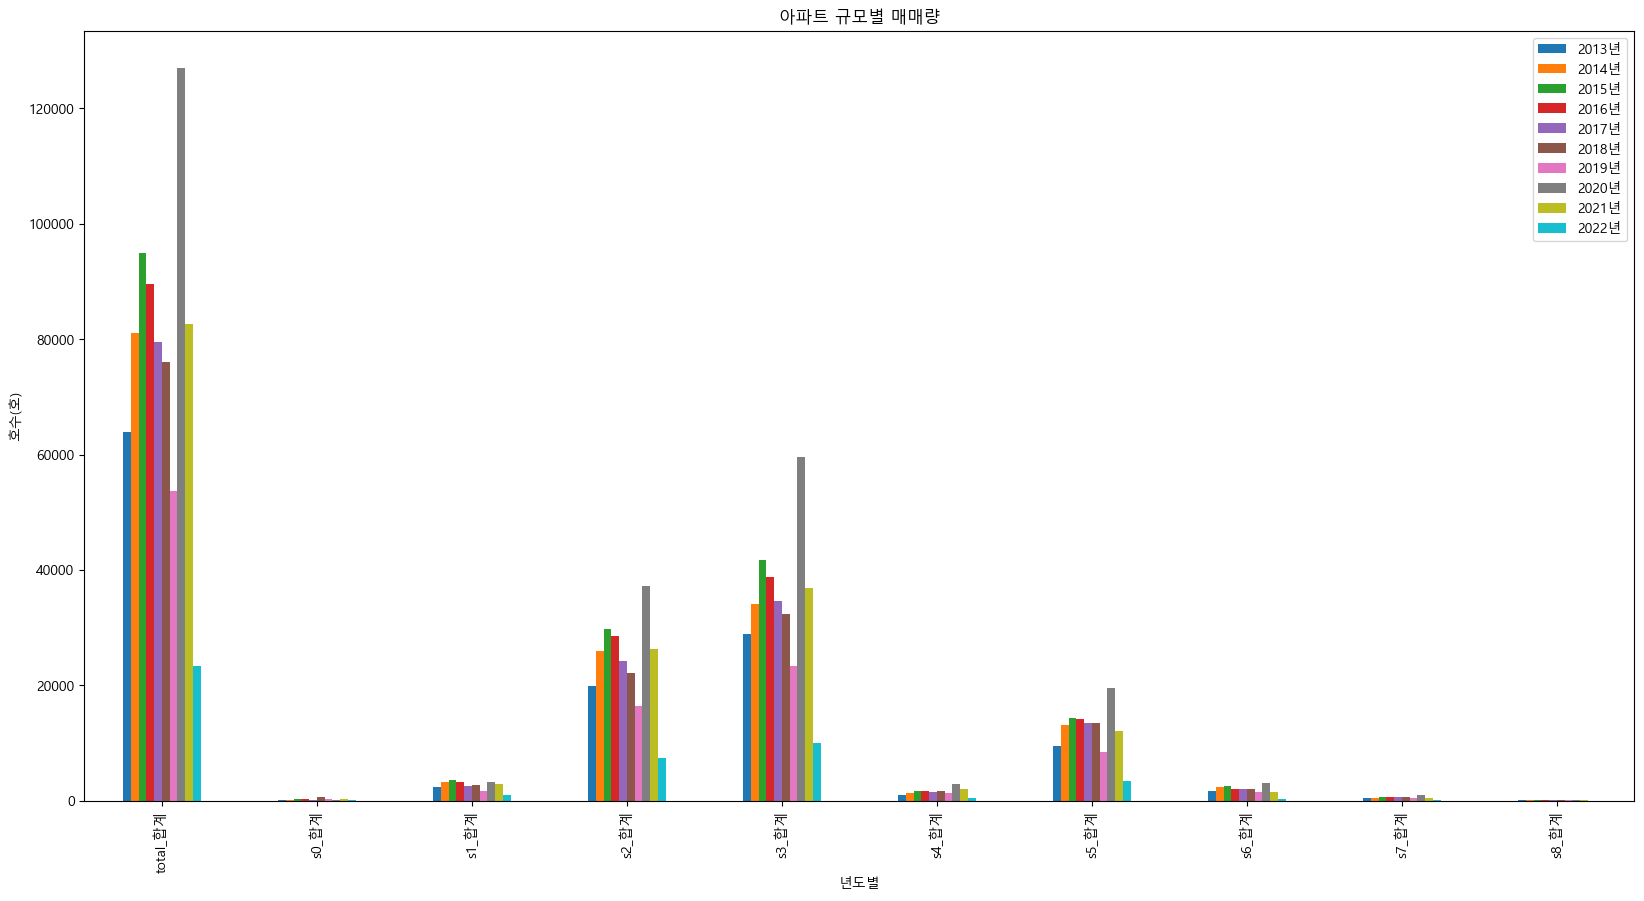

In [43]:
# 시각화 : 아파트 규모별 거래량(값=년도별)
size_tot#### 시각화에 사용한 데이터 프레임 확인 및 수정al.plot(kind='bar', figsize=(20,10), title = '아파트 규모별 매매량',
                       xlabel = '년도별', ylabel = '호수(호)')

<AxesSubplot:title={'center':'아파트 규모별 매매량'}, xlabel='년도별', ylabel='호수(호)'>

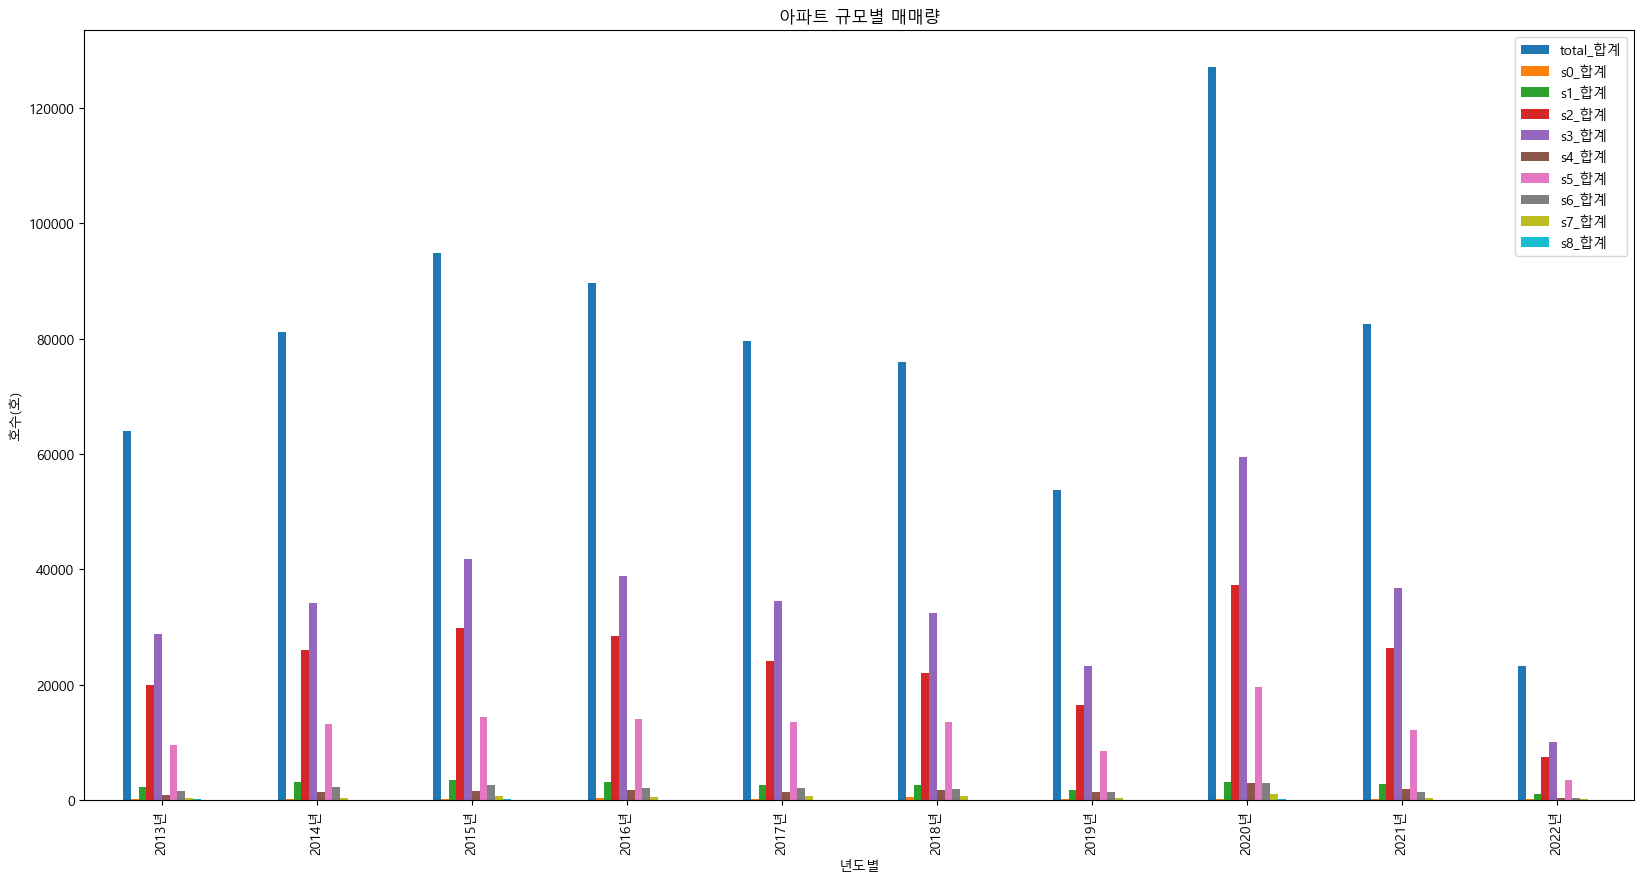

In [44]:
# 시각화 : 년도별 거래량 (값 = 규모별), total 포함
size_total.T.plot(kind='bar', figsize=(20,10), title = '아파트 규모별 매매량',
                       xlabel = '년도별', ylabel = '호수(호)')

<AxesSubplot:title={'center':'아파트 규모별 매매량'}, xlabel='년도별', ylabel='호수(호)'>

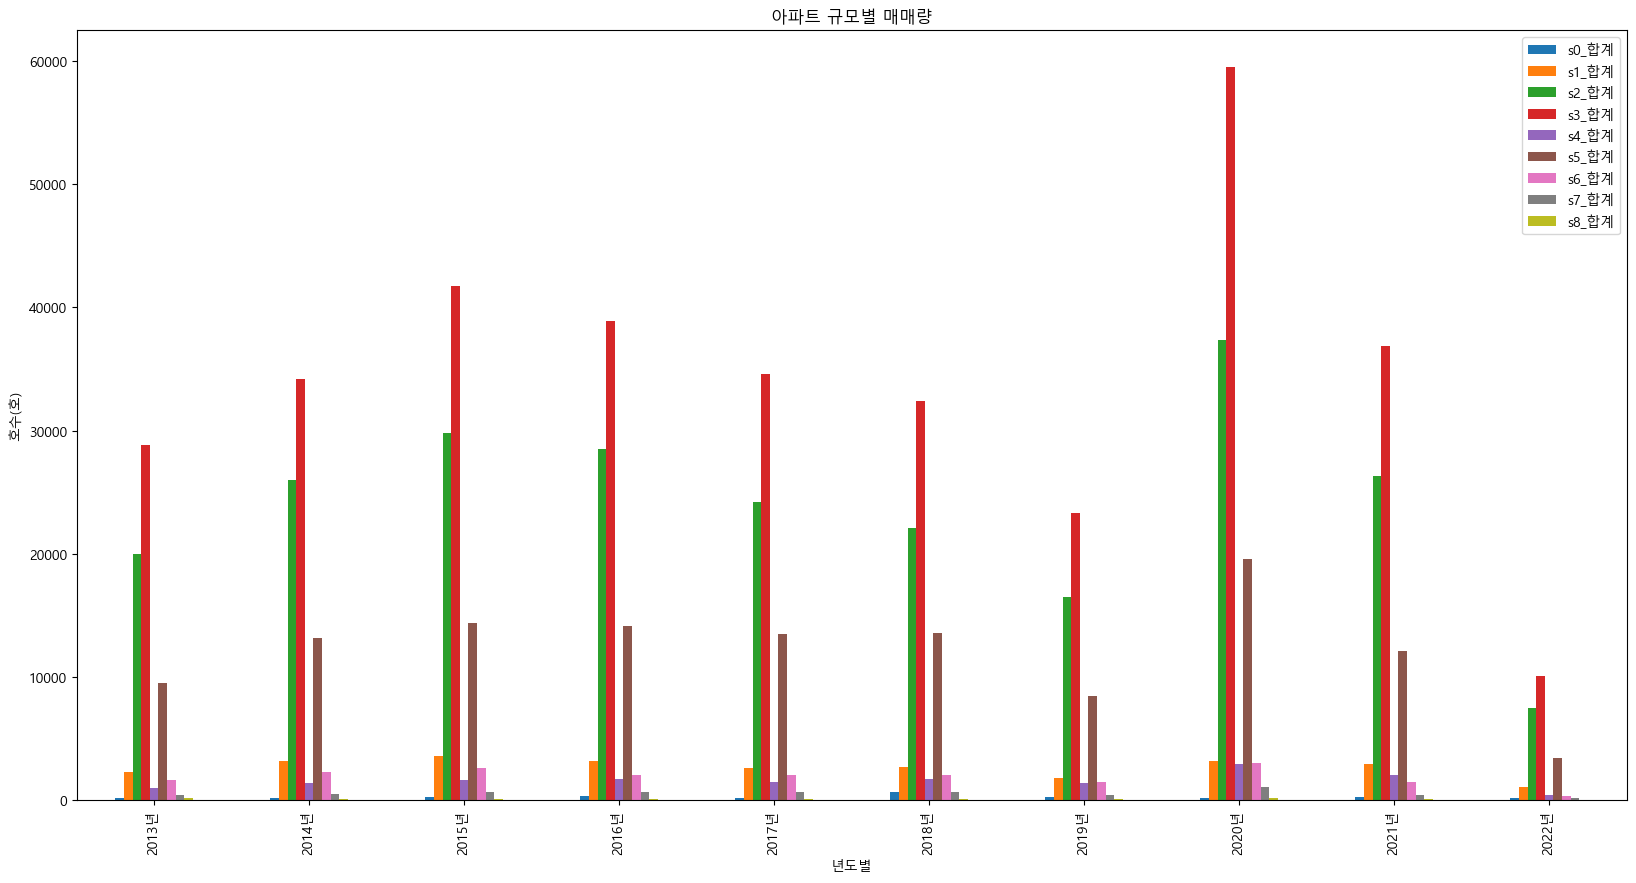

In [45]:
# 시각화 : 년도별 거래량 (값 = 규모별), total 미포함
size_total_plo.T.plot(kind='bar', figsize=(20,10), title = '아파트 규모별 매매량',
                       xlabel = '년도별', ylabel = '호수(호)')

#### 컬럼 이름 수정
* plot에 정확한 정보를 담아내기 위해 컬럼 이름을 수정

In [46]:
# 시각화에 사용할 데이터프레임 수정
gra = size_total_plo.T
gra.columns = ['20㎡이하', '21~40㎡', '41~60㎡', '61~85㎡', '86~100㎡',
       '101~135㎡', '136~165㎡', '166~198㎡', '198㎡초과']
gra.head(3)

,20㎡이하,21~40㎡,41~60㎡,61~85㎡,86~100㎡,101~135㎡,136~165㎡,166~198㎡,198㎡초과
2013년,155.0,2331.0,19979.0,28844.0,965.0,9514.0,1622.0,419.0,160.0
2014년,207.0,3198.0,25988.0,34154.0,1434.0,13187.0,2334.0,486.0,93.0
2015년,265.0,3558.0,29810.0,41755.0,1667.0,14401.0,2603.0,690.0,149.0


#### 규모 구간별 비율을 계산하여 정확한 수치를 파악

In [47]:
# 규모 구간별 비율 계산
gra_div = gra.div(gra.sum(axis=1), axis=0)
gra_div = gra_div*100
gra_div

,20㎡이하,21~40㎡,41~60㎡,61~85㎡,86~100㎡,101~135㎡,136~165㎡,166~198㎡,198㎡초과
2013년,0.242229,3.642814,31.222554,45.076498,1.508072,14.868180,2.534811,0.654800,0.250043
2014년,0.255300,3.944204,32.051899,42.123309,1.768602,16.263983,2.878603,0.599401,0.114700
2015년,0.279247,3.749289,31.412675,43.999874,1.756623,15.175241,2.742945,0.727096,0.157011
2016년,0.431862,3.569834,31.789269,43.354685,1.919386,15.783600,2.303263,0.725349,0.122751
2017년,0.198727,3.329308,30.403995,43.536337,1.900485,16.986139,2.589742,0.899303,0.155963
2018년,0.855184,3.523360,29.114424,42.652650,2.299788,17.807570,2.666860,0.901233,0.178931
2019년,0.465567,3.303661,30.686432,43.377779,2.558755,15.777124,2.744981,0.843607,0.242095
2020년,0.161344,2.516961,29.360607,46.820350,2.329645,15.416581,2.372145,0.863385,0.158983
2021년,0.328206,3.531549,31.901417,44.608211,2.450042,14.663922,1.838440,0.564370,0.113843
2022년,0.715909,4.711279,32.160158,43.190295,1.911948,14.811163,1.624727,0.737343,0.137180


#### 다양한 시각화 시도

<AxesSubplot:title={'center':'아파트 규모별 매매량'}, xlabel='년도별', ylabel='호수(호)'>

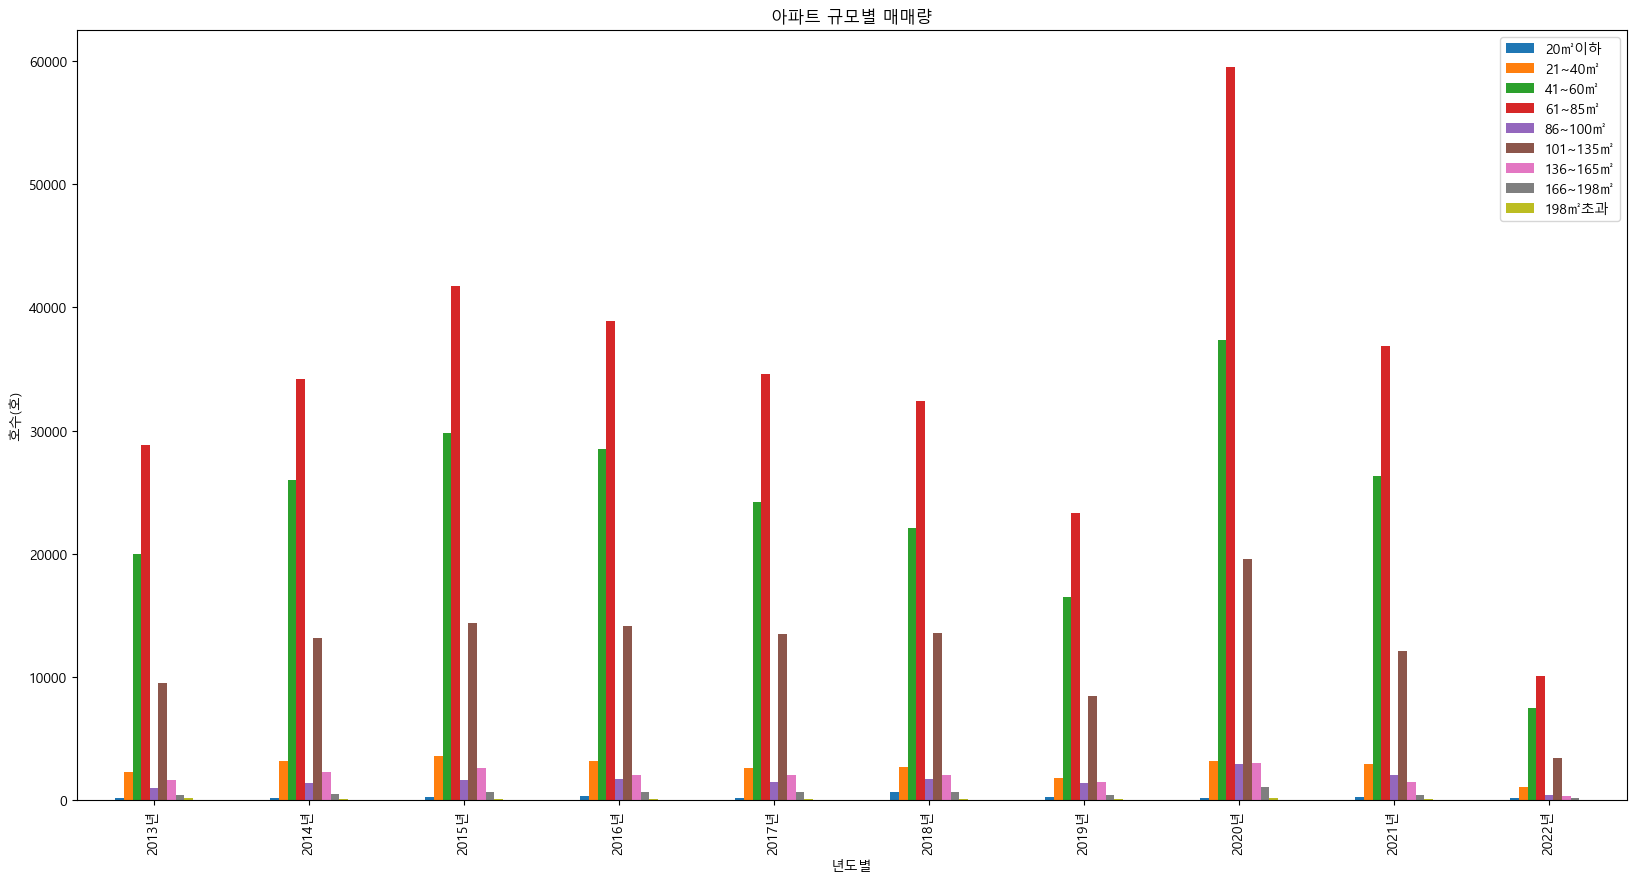

In [48]:
# 시각화 1
gra.plot(kind='bar', figsize=(20,10), title = '아파트 규모별 매매량',
                       xlabel = '년도별', ylabel = '호수(호)')

#### stacked 적용 및 plot 수정
* 주어진 정보를 효율적으로 전달하기 위해 stacked 적용
* xlabel, ylabel, title 을 추가하여 그래프에 정보를 추가

<AxesSubplot:>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013년'),
  Text(1, 0, '2014년'),
  Text(2, 0, '2015년'),
  Text(3, 0, '2016년'),
  Text(4, 0, '2017년'),
  Text(5, 0, '2018년'),
  Text(6, 0, '2019년'),
  Text(7, 0, '2020년'),
  Text(8, 0, '2021년'),
  Text(9, 0, '2022년')])

Text(0.5, 0, '기간')

Text(0, 0.5, '호수(호)')

Text(0.5, 1.0, '경기도 내 신도시 아파트 매매거래량 기간별 추이(규모별)')

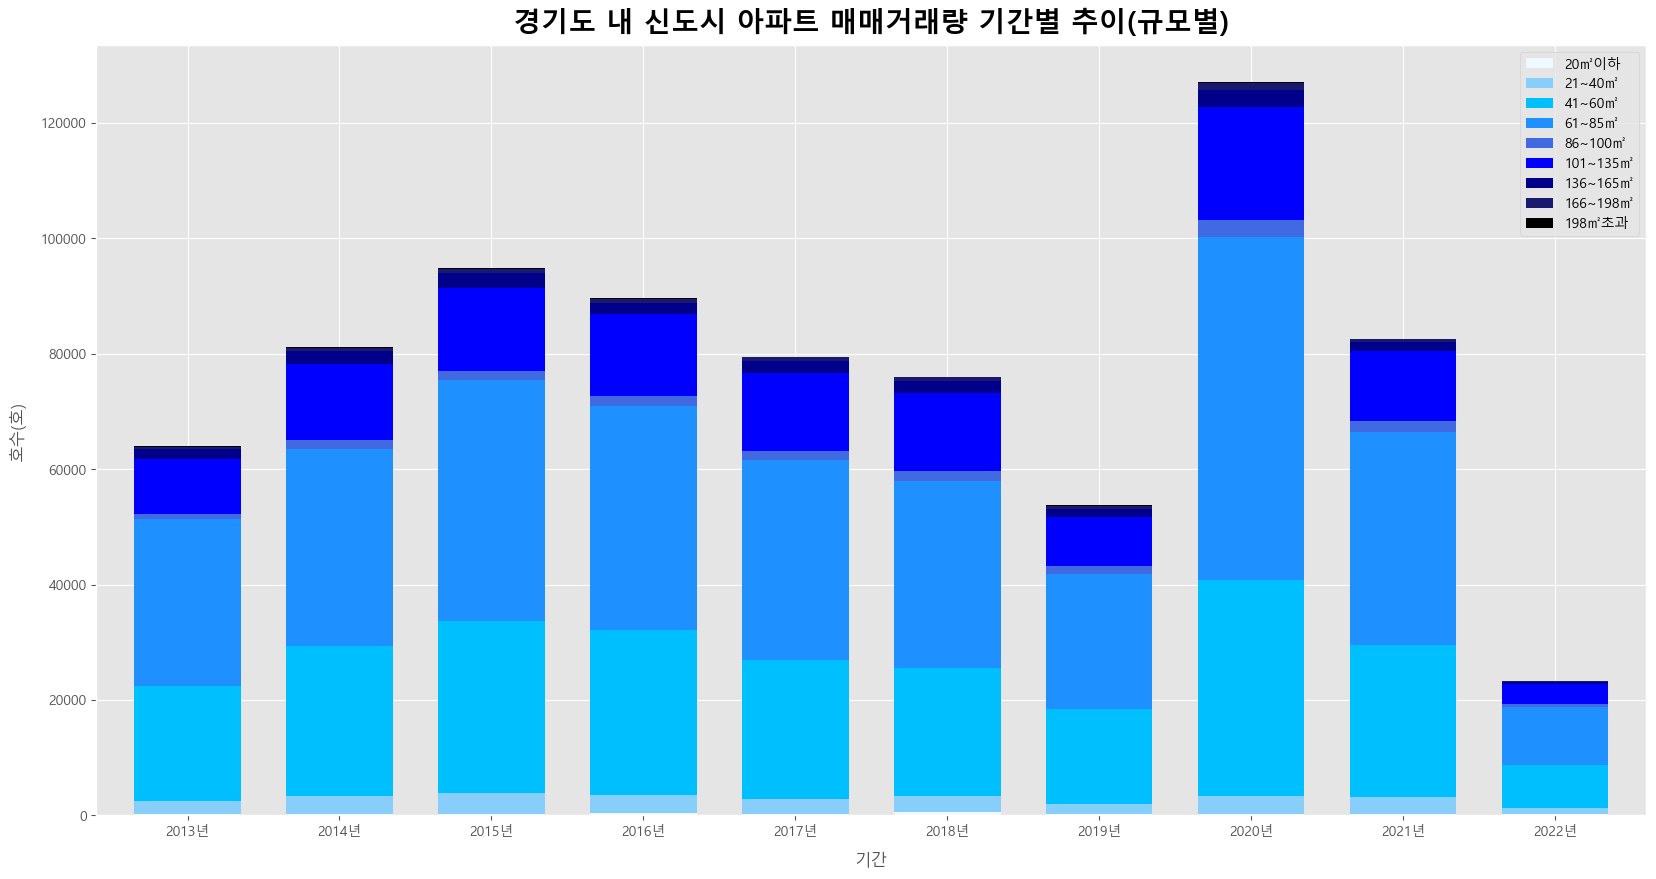

In [49]:
#### 시각화에 사용한 데이터 프레임 확인 및 수정# 시각화 2 : 경기도 내 신도시 아파트 매매거래량 기간별 추이(규모별)
plt.style.use('ggplot')
gra.plot(kind='bar',figsize=(20,10), width=0.7, stacked=True, color = ['aliceblue','lightskyblue','deepskyblue',
                                                                      'dodgerblue','royalblue','blue','darkblue','midnightblue','black'])
plt.xticks(rotation = 360)
plt.xlabel('기간', labelpad = 10)
plt.ylabel('호수(호)', labelpad = 10)
plt.title('경기도 내 신도시 아파트 매매거래량 기간별 추이(규모별)', pad = 10, fontweight = 'bold', size = 20)

plt.savefig('아파트 규모별 매매거래량.png')

In [50]:
apprix_2022

,0,2,4,6,8,10,12,14,16,18,...,260,262,264,266,268,270,272,274,276,278
2021.12 월,345.0,0.0,4.0,54.0,210.0,2.0,71.0,3.0,1.0,0.0,...,107.0,0.0,1.0,39.0,58.0,4.0,5.0,0.0,0.0,0.0
2022.01 월,114.0,0.0,2.0,42.0,56.0,0.0,14.0,0.0,0.0,0.0,...,70.0,0.0,0.0,23.0,40.0,0.0,7.0,0.0,0.0,0.0
2022.02 월,115.0,0.0,3.0,37.0,58.0,4.0,12.0,1.0,0.0,0.0,...,93.0,0.0,0.0,36.0,54.0,0.0,2.0,1.0,0.0,0.0
2022.03 월,211.0,0.0,6.0,63.0,131.0,1.0,9.0,0.0,0.0,1.0,...,93.0,0.0,0.0,43.0,45.0,2.0,3.0,0.0,0.0,0.0
2022.04 월,235.0,0.0,7.0,94.0,109.0,2.0,20.0,2.0,1.0,0.0,...,108.0,0.0,2.0,42.0,62.0,1.0,1.0,0.0,0.0,0.0
2022.05 월,190.0,0.0,4.0,85.0,64.0,4.0,32.0,1.0,0.0,0.0,...,107.0,0.0,1.0,42.0,55.0,3.0,6.0,0.0,0.0,0.0
2022.06 월,118.0,0.0,5.0,51.0,44.0,3.0,15.0,0.0,0.0,0.0,...,133.0,0.0,1.0,42.0,80.0,4.0,6.0,0.0,0.0,0.0
2022.07 월,99.0,0.0,4.0,46.0,32.0,2.0,15.0,0.0,0.0,0.0,...,76.0,0.0,1.0,33.0,39.0,1.0,2.0,0.0,0.0,0.0
2022.08 월,199.0,0.0,3.0,43.0,34.0,6.0,112.0,1.0,0.0,0.0,...,106.0,0.0,1.0,50.0,53.0,0.0,2.0,0.0,0.0,0.0
2022.09 월,74.0,0.0,2.0,31.0,33.0,1.0,6.0,1.0,0.0,0.0,...,89.0,0.0,1.0,29.0,57.0,1.0,1.0,0.0,0.0,0.0


In [51]:
apprix_2021

,0,2,4,6,8,10,12,14,16,18,...,260,262,264,266,268,270,272,274,276,278
2020.12 월,1288.0,1.0,13.0,546.0,545.0,23.0,143.0,17.0,0.0,0.0,...,811.0,0.0,7.0,283.0,464.0,11.0,44.0,2.0,0.0,0.0
2021.01 월,1082.0,1.0,8.0,346.0,559.0,27.0,129.0,12.0,0.0,0.0,...,524.0,0.0,4.0,181.0,314.0,6.0,17.0,2.0,0.0,0.0
2021.02 월,1112.0,0.0,12.0,341.0,585.0,19.0,141.0,13.0,1.0,0.0,...,465.0,0.0,5.0,174.0,252.0,10.0,23.0,1.0,0.0,0.0
2021.03 월,1016.0,0.0,7.0,336.0,536.0,15.0,109.0,11.0,2.0,0.0,...,416.0,1.0,5.0,162.0,227.0,4.0,15.0,2.0,0.0,0.0
2021.04 월,729.0,1.0,14.0,238.0,359.0,15.0,85.0,17.0,0.0,0.0,...,342.0,1.0,1.0,156.0,165.0,2.0,15.0,2.0,0.0,0.0
2021.05 월,692.0,2.0,13.0,266.0,315.0,23.0,67.0,5.0,1.0,0.0,...,360.0,0.0,4.0,143.0,194.0,3.0,16.0,0.0,0.0,0.0
2021.06 월,873.0,0.0,7.0,219.0,478.0,14.0,138.0,16.0,1.0,0.0,...,301.0,0.0,2.0,121.0,164.0,3.0,11.0,0.0,0.0,0.0
2021.07 월,792.0,0.0,11.0,263.0,388.0,22.0,99.0,8.0,1.0,0.0,...,273.0,0.0,3.0,123.0,130.0,4.0,12.0,1.0,0.0,0.0
2021.08 월,658.0,1.0,7.0,243.0,301.0,16.0,84.0,6.0,0.0,0.0,...,285.0,1.0,2.0,112.0,141.0,4.0,23.0,2.0,0.0,0.0
2021.09 월,622.0,0.0,5.0,182.0,320.0,15.0,92.0,7.0,1.0,0.0,...,220.0,0.0,1.0,81.0,127.0,2.0,9.0,0.0,0.0,0.0


### 결론
1기, 2기 신도시 아파트 매매거래량을 통해 40~85㎡ 규모를 선호하는 것을 알 수 있음.